In [20]:
# Import the necessary libraries
import pandas as pd

In [21]:
# Step 1: Load the data file using pandas
data = pd.read_csv("D:\data analystics\Python for data analytics\Practice scripts\googleplaystore.csv.csv")

In [22]:
# Step 2: Check for null values in the data and get the number of null values for each column
null_counts = data.isnull().sum()

In [23]:
# Step 3: Drop records with nulls in any of the columns
data = data.dropna()

In [24]:
# Display the first few rows of the cleaned data
print(data.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [25]:
# Display the number of null values for each column
print(null_counts)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [26]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [27]:
# Check data types of each column and get DataFrame info
data_info = data.info()

# Display the data types and additional information
print(data_info)

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB
None


In [29]:
# Step 4.1.1: Extract the numeric value from the "Size" column and convert it to KB
def size_to_kb(size):
    if size.endswith('M'):
        return float(size.replace('M', '')) * 1000  # Convert from MB to KB
    elif size.endswith('k'):
        return float(size.replace('k', ''))  # Already in KB
    elif size == 'Varies with device':
        return None  # Placeholder for "Varies with device" values
    else:
        return None  # Handle other cases or missing data as needed

data['Size'] = data['Size'].apply(size_to_kb)

# Step 4.1.2: Replace "Varies with device" with the average size
average_size = data['Size'].mean()
data['Size'].replace('Varies with device', average_size, inplace=True)

# Step 4.1.3: Check if the "Size" column is in integer data type (int)
data['Size'] = data['Size'].astype('float')  # Convert to float to handle possible NaN values

# Check the data types and the first few rows of the DataFrame after cleaning
print(data.dtypes)
print(data.head())

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size     Installs  Type Price Content Rating  \
0     159  19000.0      10,000+  Free     0       Everyone   
1     967  14000.0     500,000+  Free     0

In [30]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [31]:
# Step 4.2: Convert the "Reviews" field to numeric (int/float)
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

# Step 4.3: Format the "Installs" field
# Step 4.3.1: Treat "1,000,000+" as 1,000,000
data['Installs'] = data['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)

# Step 4.3.2: Remove '+' and ',' and convert it to an integer
data['Installs'] = data['Installs'].str.replace(',', '').astype(int)

# Step 4.4: Format the "Price" field
data['Price'] = data['Price'].str.replace('$', '').astype(float)

# Check the data types and the first few rows of the DataFrame after cleaning
print(data.dtypes)
print(data.head())

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0   

In [32]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [33]:
# 5.1. Drop rows with average ratings outside the range of 1 to 5
data = data[(data['Rating'] >= 1) & (data['Rating'] <= 5)]

# 5.2. Drop rows where the number of reviews is greater than the number of installs
data = data[data['Reviews'] <= data['Installs']]

# 5.3. Drop rows where the app type is "Free" but the price is greater than 0
data = data[~((data['Type'] == 'Free') & (data['Price'] > 0))]

# Check the data shape after cleaning
print(data.shape)

(9353, 13)


In [34]:
# Display a random sample of 25 rows from the cleaned dataset
random_sample = data.sample(25)
print(random_sample)

                                                     App            Category  \
1929                                      Kick the Buddy                GAME   
7938                                        Crazy Wheels                GAME   
4160                                      G Cloud Backup        PRODUCTIVITY   
5935                         BA VPN - Free Unlimited VPN              FAMILY   
588                                   Adult Dirty Emojis              DATING   
1325         Seven - 7 Minute Workout Training Challenge  HEALTH_AND_FITNESS   
209                                      Plugin:AOT v5.0            BUSINESS   
8975                                            SportCAM               TOOLS   
2121           Transformers Rescue Bots: Hero Adventures              FAMILY   
9547                                            EL NORTE  NEWS_AND_MAGAZINES   
2397                               Paramedic Pocket Prep             MEDICAL   
7781                      Counter Deck C

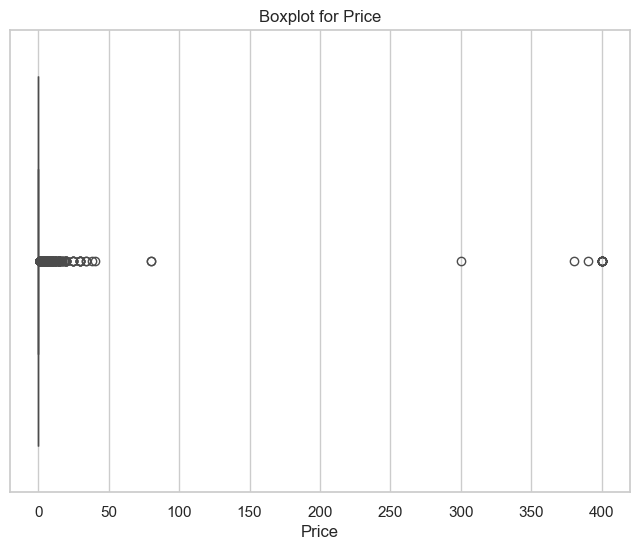

In [36]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set(style="whitegrid")

# 6.1 Boxplot for Price
plt.figure(figsize=(8, 6))
sns.boxplot(x=data["Price"])
plt.title("Boxplot for Price")
plt.xlabel("Price")
plt.show()

In [37]:
# 6.1.1 Are there any outliers?
# To check for outliers, you can calculate the interquartile range (IQR) and use it to identify outliers.

Q1 = data["Price"].quantile(0.25)
Q3 = data["Price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_price = data[(data["Price"] < lower_bound) | (data["Price"] > upper_bound)]
print("Apps with Price outliers:")
print(outliers_price)

Apps with Price outliers:
                                                 App            Category  \
234    TurboScan: scan documents and receipts in PDF            BUSINESS   
235                   Tiny Scanner Pro: PDF Doc Scan            BUSINESS   
290    TurboScan: scan documents and receipts in PDF            BUSINESS   
291                   Tiny Scanner Pro: PDF Doc Scan            BUSINESS   
427                               Puffin Browser Pro       COMMUNICATION   
...                                              ...                 ...   
10682                            Fruit Ninja Classic                GAME   
10690                                       FO Bixby     PERSONALIZATION   
10760                                Fast Tract Diet  HEALTH_AND_FITNESS   
10782                        Trine 2: Complete Story                GAME   
10785                                   sugar, sugar              FAMILY   

       Rating  Reviews     Size  Installs  Type  Price Conten

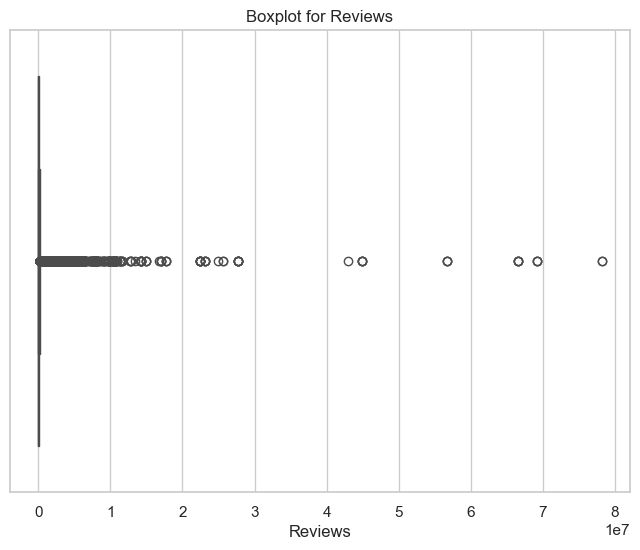

In [38]:
# 6.2 Boxplot for Reviews
plt.figure(figsize=(8, 6))
sns.boxplot(x=data["Reviews"])
plt.title("Boxplot for Reviews")
plt.xlabel("Reviews")
plt.show()

In [39]:
# 6.2.1 Are there any apps with very high number of reviews?
# You can consider apps with reviews significantly higher than the majority as potential outliers.

high_reviews_threshold = 1e6  # Define your threshold for "very high" reviews
high_reviews_apps = data[data["Reviews"] > high_reviews_threshold]
print("Apps with very high number of reviews:")
print(high_reviews_apps)

Apps with very high number of reviews:
                                          App             Category  Rating  \
139                      Wattpad 📖 Free Books  BOOKS_AND_REFERENCE     4.6   
152                         Google Play Books  BOOKS_AND_REFERENCE     3.9   
189                               Uber Driver             BUSINESS     4.4   
194    OfficeSuite : Free Office + PDF Editor             BUSINESS     4.3   
201                    Facebook Pages Manager             BUSINESS     4.0   
...                                       ...                  ...     ...   
10190                         Fallout Shelter               FAMILY     4.6   
10200                  Facebook Pages Manager             BUSINESS     4.0   
10327                        Garena Free Fire                 GAME     4.5   
10636                      FRONTLINE COMMANDO                 GAME     4.4   
10707          Photo Editor Collage Maker Pro          PHOTOGRAPHY     4.5   

       Reviews     Size 

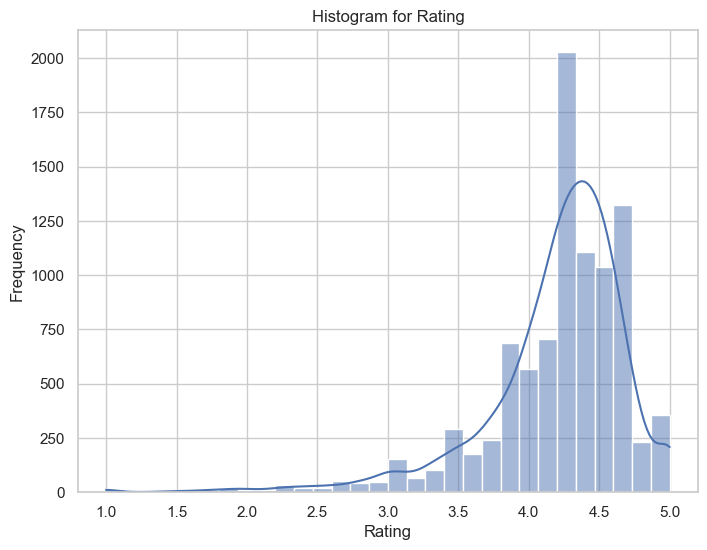

In [40]:
# 6.3 Histogram for Rating
plt.figure(figsize=(8, 6))
sns.histplot(data["Rating"], bins=30, kde=True)
plt.title("Histogram for Rating")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

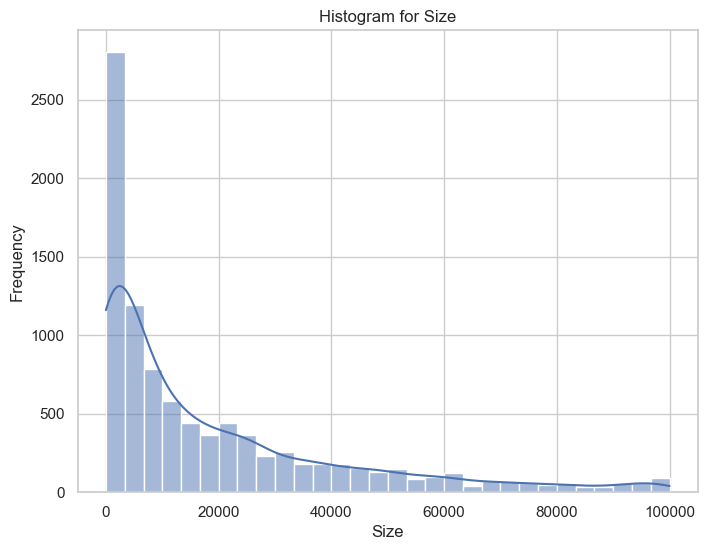

In [41]:
# 6.4 Histogram for Size
# Before plotting, handle any NaN values in the Size column.
data["Size"].fillna(0, inplace=True)
data["Size"] = data["Size"].astype(float)

plt.figure(figsize=(8, 6))
sns.histplot(data["Size"], bins=30, kde=True)
plt.title("Histogram for Size")
plt.xlabel("Size")
plt.ylabel("Frequency")
plt.show()

In [42]:
#Check out the records with very high prices (e.g., $200) to see if they are indeed outliers.
high_price_apps = data[data['Price'] > 200]

In [43]:
#After reviewing the high-priced apps, decide if they are legitimate or junk. If they are junk, drop them from the dataset.
data = data[data['Price'] <= 200]

In [44]:
#Drop records with more than 2 million reviews.
data = data[data['Reviews'] <= 2000000]

In [45]:
#Calculate different percentiles (10, 25, 50, 70, 90, 95, 99) for the Installs column to decide on a cutoff for outliers.
percentiles = data['Installs'].quantile([0.10, 0.25, 0.50, 0.70, 0.90, 0.95, 0.99])
print(percentiles)

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64


In [46]:
#99th percentile (100,000,000) as a threshold to drop records with very high installs as outliers:
threshold = data['Installs'].quantile(0.99)
data = data[data['Installs'] <= threshold]

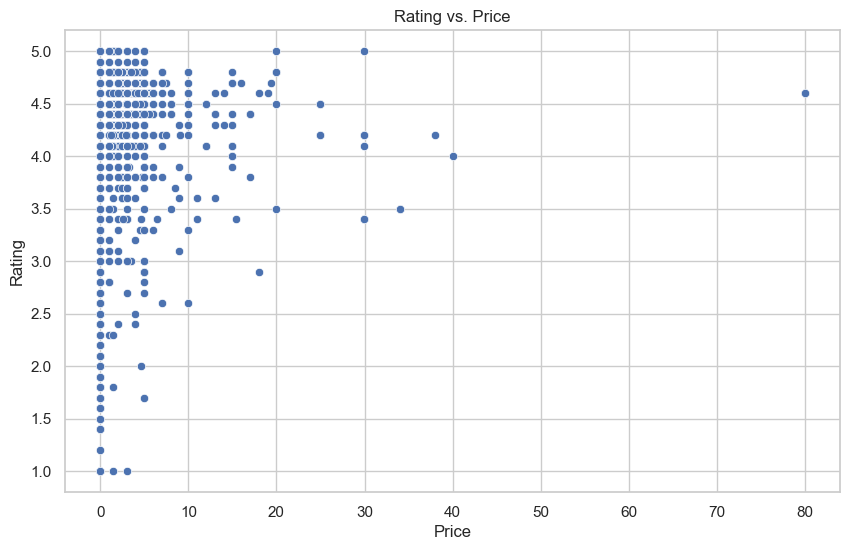

In [47]:
#8.1. Scatter plot/joinplot for Rating vs. Price:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', data=data)
plt.title('Rating vs. Price')
plt.show()

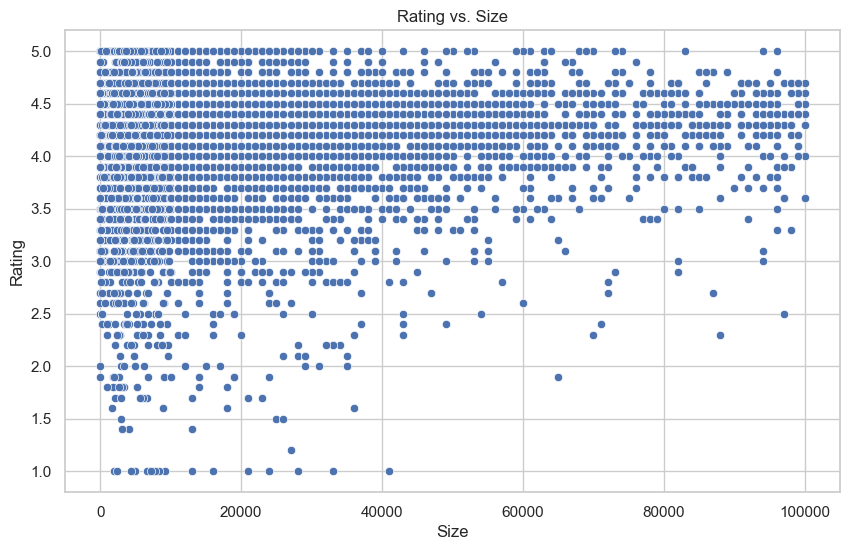

In [48]:
#8.2. Scatter plot/joinplot for Rating vs. Size:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Rating', data=data)
plt.title('Rating vs. Size')
plt.show()

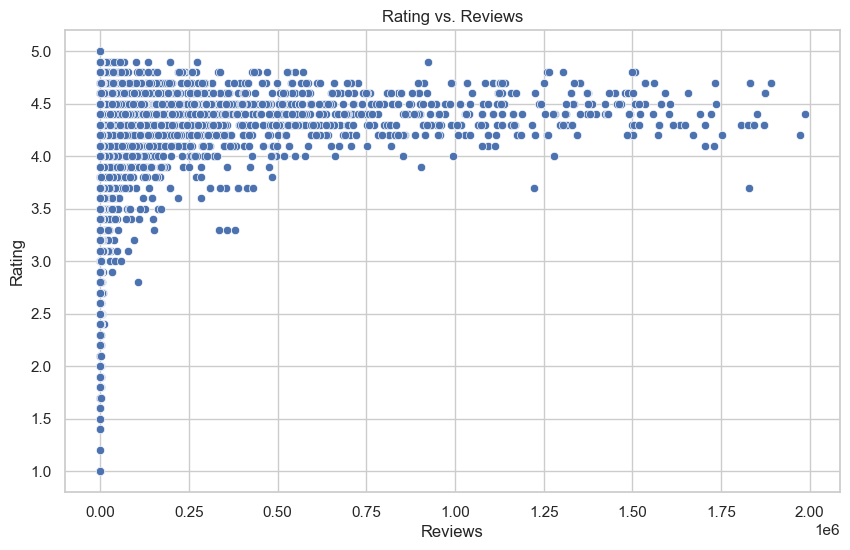

In [49]:
#8.3. Scatter plot/joinplot for Rating vs. Reviews:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews', y='Rating', data=data)
plt.title('Rating vs. Reviews')
plt.show()

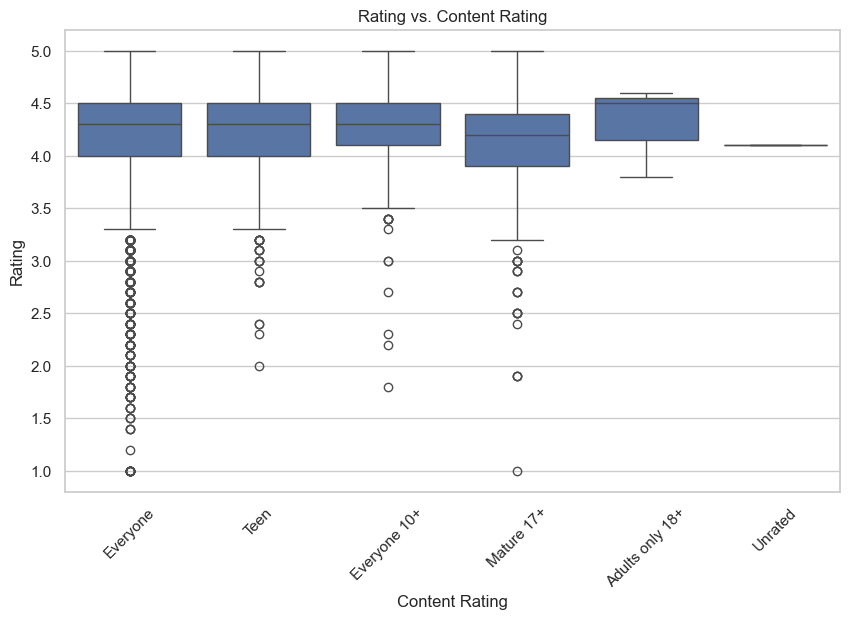

In [50]:
#8.4. Boxplot for Rating vs. Content Rating:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Content Rating', y='Rating', data=data)
plt.title('Rating vs. Content Rating')
plt.xticks(rotation=45)
plt.show()

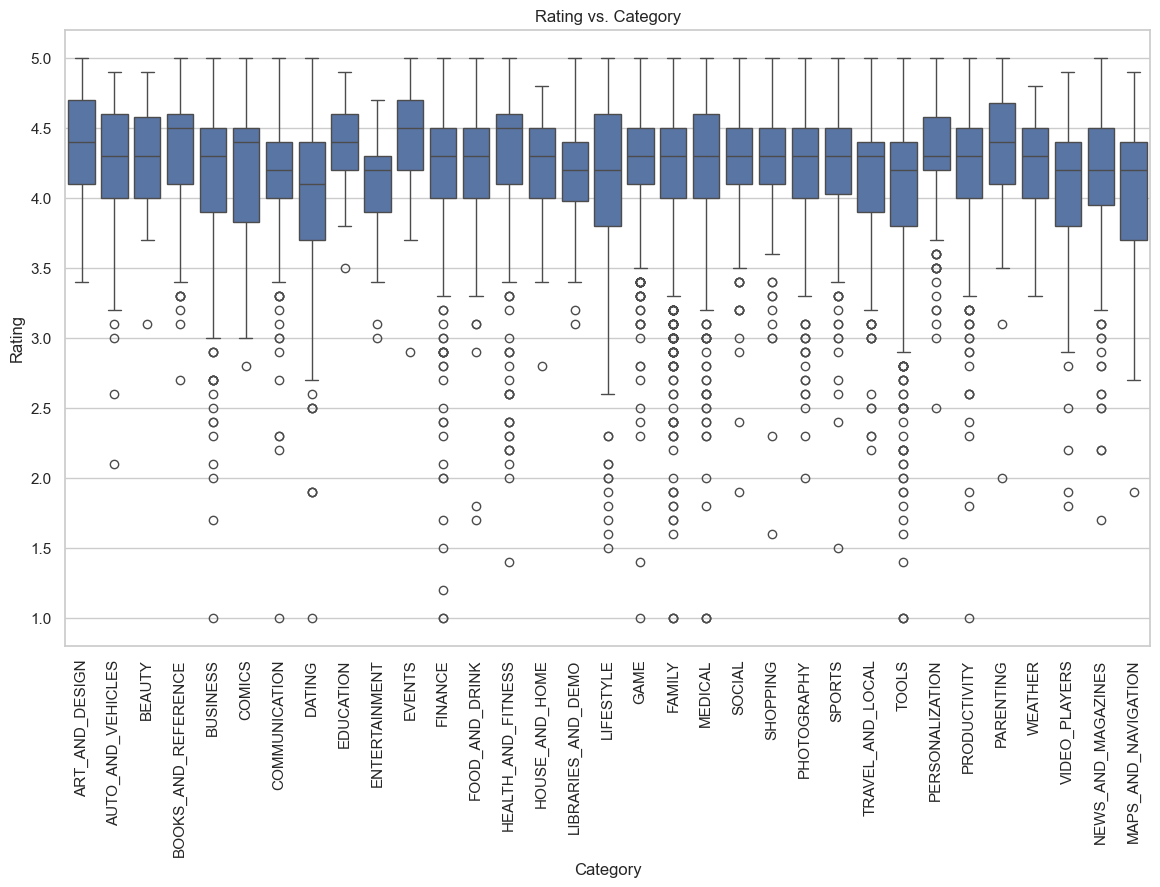

In [51]:
#8.5. Boxplot for Ratings vs. Category:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='Rating', data=data)
plt.title('Rating vs. Category')
plt.xticks(rotation=90)
plt.show()

In [52]:
# Create a copy of the dataframe
inp1 = data.copy()

In [54]:
import numpy as np
# 9.1. Apply log transformation to Reviews and Installs
inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1['Installs'] = np.log1p(inp1['Installs'])

In [55]:
# 9.2. Drop unnecessary columns
columns_to_drop = ['App', 'Last Updated', 'Current Ver', 'Android Ver']
inp1 = inp1.drop(columns=columns_to_drop)

In [56]:
# 9.3. Get dummy columns for Category, Genres, and Content Rating
inp2 = pd.get_dummies(inp1, columns=['Category', 'Genres', 'Content Rating'])

In [57]:
# Display the first few rows of inp2
inp2.head()

,Rating,Reviews,Size,Installs,Type,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,Free,0.0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,3.9,6.875232,14000.0,13.122365,Free,0.0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,4.7,11.379520,8700.0,15.424949,Free,0.0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,4.5,12.281389,25000.0,17.727534,Free,0.0,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,4.3,6.875232,2800.0,11.512935,Free,0.0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [58]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (y)
X = inp2.drop(columns=['Rating'])
y = inp2['Rating']

# Split the data into training (70%) and testing (30%) sets
df_train, df_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the resulting dataframes
print("Shape of df_train:", df_train.shape)
print("Shape of df_test:", df_test.shape)

Shape of df_train: (6205, 159)
Shape of df_test: (2660, 159)


In [61]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,12.281389,25000.0,17.727534,Free,0.0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity


In [62]:
inp2.head()

,Rating,Reviews,Size,Installs,Type,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,Free,0.0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,3.9,6.875232,14000.0,13.122365,Free,0.0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,4.7,11.379520,8700.0,15.424949,Free,0.0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,4.5,12.281389,25000.0,17.727534,Free,0.0,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,4.3,6.875232,2800.0,11.512935,Free,0.0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [63]:
# Assuming 'inp2' is the dataframe containing the data
X = inp2.drop(columns=['Rating'])  # Features
y = inp2['Rating']  # Target variable

# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Split the data into a 70-30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6205, 159)
Shape of y_train: (6205,)
Shape of X_test: (2660, 159)
Shape of y_test: (2660,)


In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 12.1 Use linear regression as the technique
# Create a Linear Regression model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# 12.2 Report the R2 on the train set
# Predict ratings on the training data
y_train_pred = lr_model.predict(X_train)

# Calculate the R2 score on the training data
r2_train = r2_score(y_train, y_train_pred)

print(f"R2 on the train set: {r2_train}")

R2 on the train set: 0.16619066160922713
